# **Human Activity Recognition (HAR) Using Smartphones Dataset Analysis**

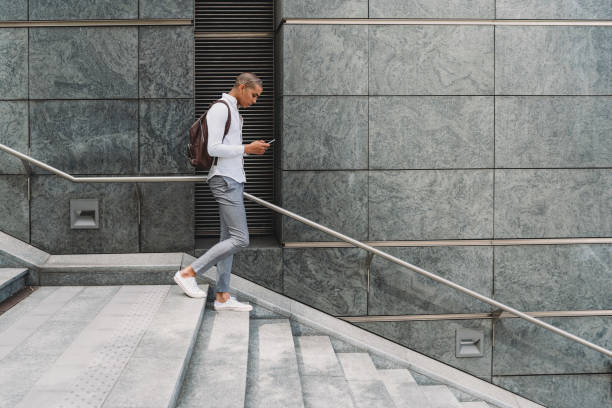

**Anggota Kelompok 9**:  
- Krisna Arinugraha Liantara - 225150207111022
- Muhammad Hasan Fadhlillah - 225150207111026
- Muhammad Husain Fadhlillah - 225150207111027


## **Project Overview**

### Latar Belakang
- Dengan meningkatnya penggunaan smartphone yang dilengkapi berbagai sensor (accelerometer dan gyroscope), terbuka peluang untuk mengembangkan sistem yang dapat mengenali aktivitas manusia secara otomatis.
- Sensor pada smartphone dapat mengumpulkan data gerakan yang detail dan dapat digunakan untuk mengklasifikasikan berbagai aktivitas fisik.
- Kemampuan mengenali aktivitas manusia memiliki aplikasi penting di berbagai bidang seperti:
  - Healthcare monitoring
  - Fitness tracking
  - Elder care
  - Sports analysis
  - Smart home automation


### **Masalah**
Pengenalan aktivitas manusia secara akurat menjadi tantangan utama karena adanya aktivitas yang mirip serta adanya variasi individu dalam melakukan gerakan. Sensor ponsel memberikan data yang kaya, tetapi tantangannya adalah bagaimana memilih fitur-fitur yang signifikan dan menerapkan model yang mampu membedakan aktivitas-aktivitas yang tampak serupa.

### **Tujuan**

1. Mengembangkan model machine learning yang dapat mengklasifikasikan 3 aktivitas dasar manusia dengan akurasi tinggi.
2. Memahami pola karakteristik dari setiap aktivitas berdasarkan data sensor.
3. Mengidentifikasi fitur-fitur yang paling berpengaruh dalam membedakan aktivitas.
4. Menganalisis performa model dalam membedakan aktivitas yang memiliki karakteristik mirip.

### **Manfaat**

1. Bidang Kesehatan:
   - Monitoring aktivitas pasien
   - Deteksi anomali gerakan
   - Tracking rehabilitasi fisik
   - Pencatatan aktivitas harian untuk analisis kesehatan

2. Fitness & Sports:
   - Tracking latihan otomatis
   - Analisis performa olahraga
   - Pemantauan intensitas aktivitas
   - Feedback real-time untuk perbaikan gerakan

3. Elderly Care:
   - Deteksi jatuh
   - Monitoring aktivitas sehari-hari
   - Alert system untuk situasi darurat
   - Tracking pola aktivitas untuk deteksi perubahan kesehatan

4. Research & Development:
   - Pengembangan algoritma HAR yang lebih baik
   - Studi pola aktivitas manusia
   - Pengembangan aplikasi healthcare berbasis smartphone

## **Data Understanding**

### Sumber Dataset

Dataset yang digunakan berasal dari UCI Machine Learning Repository, dengan nama "Human Activity Recognition Using Smartphones". Dataset ini juga tersedia di Kaggle sebagai alternatif.
  - URL UCI: https://archive.ics.uci.edu/dataset/240
  - URL Kaggle: https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones/data

### Deskripsi Dataset

Dataset ini dikumpulkan melalui eksperimen yang melibatkan 30 relawan dengan rentang usia 19-48 tahun. Para relawan melakukan 6 aktivitas dasar, yaitu:
1. WALKING (berjalan di permukaan datar)
2. WALKING_UPSTAIRS (menaiki tangga)
3. WALKING_DOWNSTAIRS (menuruni tangga)
4. SITTING (duduk)
5. STANDING (berdiri)
6. LAYING (berbaring)


### Struktur Dataset Secara Umum

Dataset ini terdiri dari file data fitur (X_train.txt dan X_test.txt) yang mencakup 561 kolom fitur dari sinyal sensor dan file label aktivitas (y_train.txt dan y_test.txt) yang menunjukkan aktivitas spesifik yang dilakukan. File features.txt menyediakan deskripsi dari setiap fitur, sedangkan activity_labels.txt mendefinisikan kode untuk setiap aktivitas.


### Statistik Dataset

- Total samples: 10,299
- Training samples: 7,352 (71.5%)
- Test samples: 2,947 (28.5%)
- Balanced distribution antar aktivitas
- Feature scaling sudah diterapkan (normalized & bounded within [-1,1])

### Karakteristik Dataset

- Jumlah Fitur Total: 561
- Tipe Data: Numerik (representasi sinyal dari sensor)
- Pembagian Dataset:
  - Training Set: 70%
  - Testing Set: 30%
- Preprocessing:
  - Noise filtering diterapkan pada sinyal mentah untuk mengurangi noise.
  - Fitur diekstrak dengan teknik domain waktu dan domain frekuensi, seperti mean, standar deviasi, magnitude, dan Fast Fourier Transform (FFT).

### Fitur yang Digunakan

Dalam proyek ini, hanya subset fitur tertentu yang digunakan untuk memudahkan analisis dan pengembangan model. Fokus utama adalah fitur dari sensor gyroscope dengan nama prefiks tBodyGyro (Time Domain Signals).

- Fitur yang Dipilih:
  - Gyroscope Minimum Values:
    - tBodyGyro-min()-X
    - tBodyGyro-min()-Y
    - tBodyGyro-min()-Z
  - Gyroscope Standard Deviation:
    - tBodyGyro-std()-X
    - tBodyGyro-std()-Y
    - tBodyGyro-std()-Z

- Alasan Pemilihan Fitur:
  - Fitur minimum dan standar deviasi dari gyroscope dipilih karena memberikan informasi penting tentang perubahan gerakan angular, baik dalam pola regular maupun perubahan mendadak. Fitur ini relevan untuk membedakan aktivitas seperti WALKING, WALKING_DOWNSTAIRS, dan LAYING. Statistik minimum (min()) digunakan untuk menangkap nilai terendah, sedangkan deviasi standar (std()) menggambarkan variabilitas gerakan pada tiap axis.


### Peran dan Signifikansi Fitur

- LAYING: Gyroscope hampir tidak menunjukkan perubahan, sehingga fitur min() sangat kecil.
- WALKING: Variasi tinggi pada gyroscope (std() besar) karena pola gerakan berulang.
- WALKING_DOWNSTAIRS: Gyroscope memiliki variasi tinggi dengan pola amplitudo lebih besar daripada WALKING.

### Aktivitas yang Difokuskan

Hanya 3 dari 6 aktivitas dalam dataset yang dianalisis:
1. LAYING: Representasi aktivitas statis, dengan sinyal gyroscope minimal.
2. WALKING: Aktivitas dinamis dengan pola gyroscope periodik.
3. WALKING_DOWNSTAIRS: Aktivitas dinamis dengan pola gyroscope lebih intens karena adanya gaya dorong tambahan.

Distribusi Data:
- Training Set: 3619 sampel
- Testing Set: 1453 sampel


### Transformasi Data
- Outlier Removal: Diterapkan metode IQR (Interquartile Range) untuk menghilangkan data ekstrim.
- Standardisasi Data: Semua fitur dinormalisasi menggunakan StandardScaler untuk menghindari skala yang tidak konsisten.

### Kelas Data

Kelas pada dataset direpresentasikan dalam format numerik (1 untuk WALKING, 3 untuk WALKING_DOWNSTAIRS, dan 6 untuk LAYING), yang kemudian dimapping ke format label untuk kemudahan interpretasi model:
- 1 → WALKING
- 3 → WALKING_DOWNSTAIRS
- 6 → LAYING

Dataset akhir setelah preprocessing memiliki ukuran sebagai berikut:
- Training Set: 2928 sampel, 26 fitur.
- Testing Set: 1233 sampel, 26 fitur.

## **Step 1: Import Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set random seed dan style visualisasi
np.random.seed(42)

## **Step 2: Load Data**

In [ ]:
# Download and unzip dataset if not available
import os
if not os.path.exists('UCI HAR Dataset'):
    !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
    !unzip 'UCI HAR Dataset.zip'

# Load data
print("Loading data...")
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None)
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None)

# Load features dan activity labels
features = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)[1]
activity_labels = pd.read_csv('UCI HAR Dataset/activity_labels.txt',
                            delim_whitespace=True, header=None)[1]

# Set column names
X_train.columns = features
X_test.columns = features

--2024-11-28 00:09:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip     [                <=> ]  58.17M  15.8MB/s    in 4.9s    

2024-11-28 00:09:37 (12.0 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314]

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.t

## **Step 3: Exploratory Data Analysis (EDA)**

Visualisasi distribusi aktivitas awal...


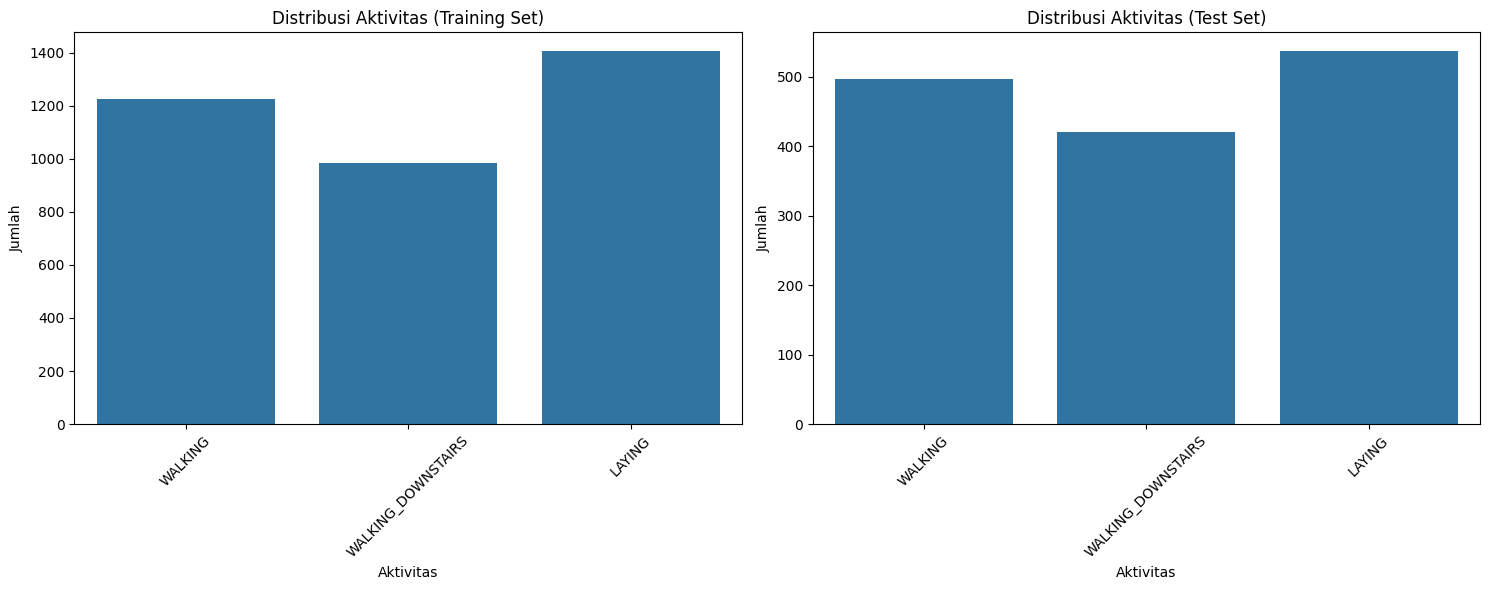


Distribusi Aktivitas (Training Set):
0
1    1226
3     986
6    1407
Name: count, dtype: int64

Distribusi Aktivitas (Test Set):
0
1    496
3    420
6    537
Name: count, dtype: int64


In [ ]:
# Visualisasi distribusi aktivitas awal
print("Visualisasi distribusi aktivitas awal...")
plt.figure(figsize=(15, 6))

# Training Set
plt.subplot(1, 2, 1)
sns.countplot(x=y_train.iloc[:, 0], order=[1, 3, 6])  # Fokus pada aktivitas tertentu
plt.title('Distribusi Aktivitas (Training Set)')
plt.xlabel('Aktivitas')
plt.ylabel('Jumlah')
plt.xticks([0, 1, 2], ['WALKING', 'WALKING_DOWNSTAIRS', 'LAYING'], rotation=45)

# Test Set
plt.subplot(1, 2, 2)
sns.countplot(x=y_test.iloc[:, 0], order=[1, 3, 6])  # Fokus pada aktivitas tertentu
plt.title('Distribusi Aktivitas (Test Set)')
plt.xlabel('Aktivitas')
plt.ylabel('Jumlah')
plt.xticks([0, 1, 2], ['WALKING', 'WALKING_DOWNSTAIRS', 'LAYING'], rotation=45)

plt.tight_layout()
plt.show()

# Distribusi aktivitas dalam bentuk teks
print("\nDistribusi Aktivitas (Training Set):")
print(y_train.iloc[:, 0].value_counts().reindex([1, 3, 6]))

print("\nDistribusi Aktivitas (Test Set):")
print(y_test.iloc[:, 0].value_counts().reindex([1, 3, 6]))

1. Grafik Training Set:
  - Menampilkan distribusi tiga jenis aktivitas:
    - WALKING: 1.226 data
    - WALKING_DOWNSTAIRS: 986 data
    - LAYING: 1.407 data
  - Aktivitas LAYING memiliki jumlah data terbanyak, diikuti WALKING, dan terakhir WALKING_DOWNSTAIRS.
  - Grafik ini memberikan gambaran distribusi aktivitas dalam dataset training.

2. Grafik Test Set:
  - Distribusi aktivitas pada dataset test memiliki pola yang sama, tetapi jumlahnya lebih kecil:
    - WALKING: 496 data
    - WALKING_DOWNSTAIRS: 420 data
    - LAYING: 537 data
  - Seperti Training Set, aktivitas LAYING tetap menjadi yang paling banyak, diikuti oleh WALKING, dan WALKING_DOWNSTAIRS yang paling sedikit.


Dalam visualisasi ini, dapat dilihat bahwasanya distribusi 3 kelas aktivitas ini sudah cukup balance sehingga tidak perlu dilakukan teknik balancing seperti undersampling atau oversampling.


Menyiapkan fitur gyroscope...

Visualisasi karakteristik fitur gyroscope untuk setiap aktivitas...


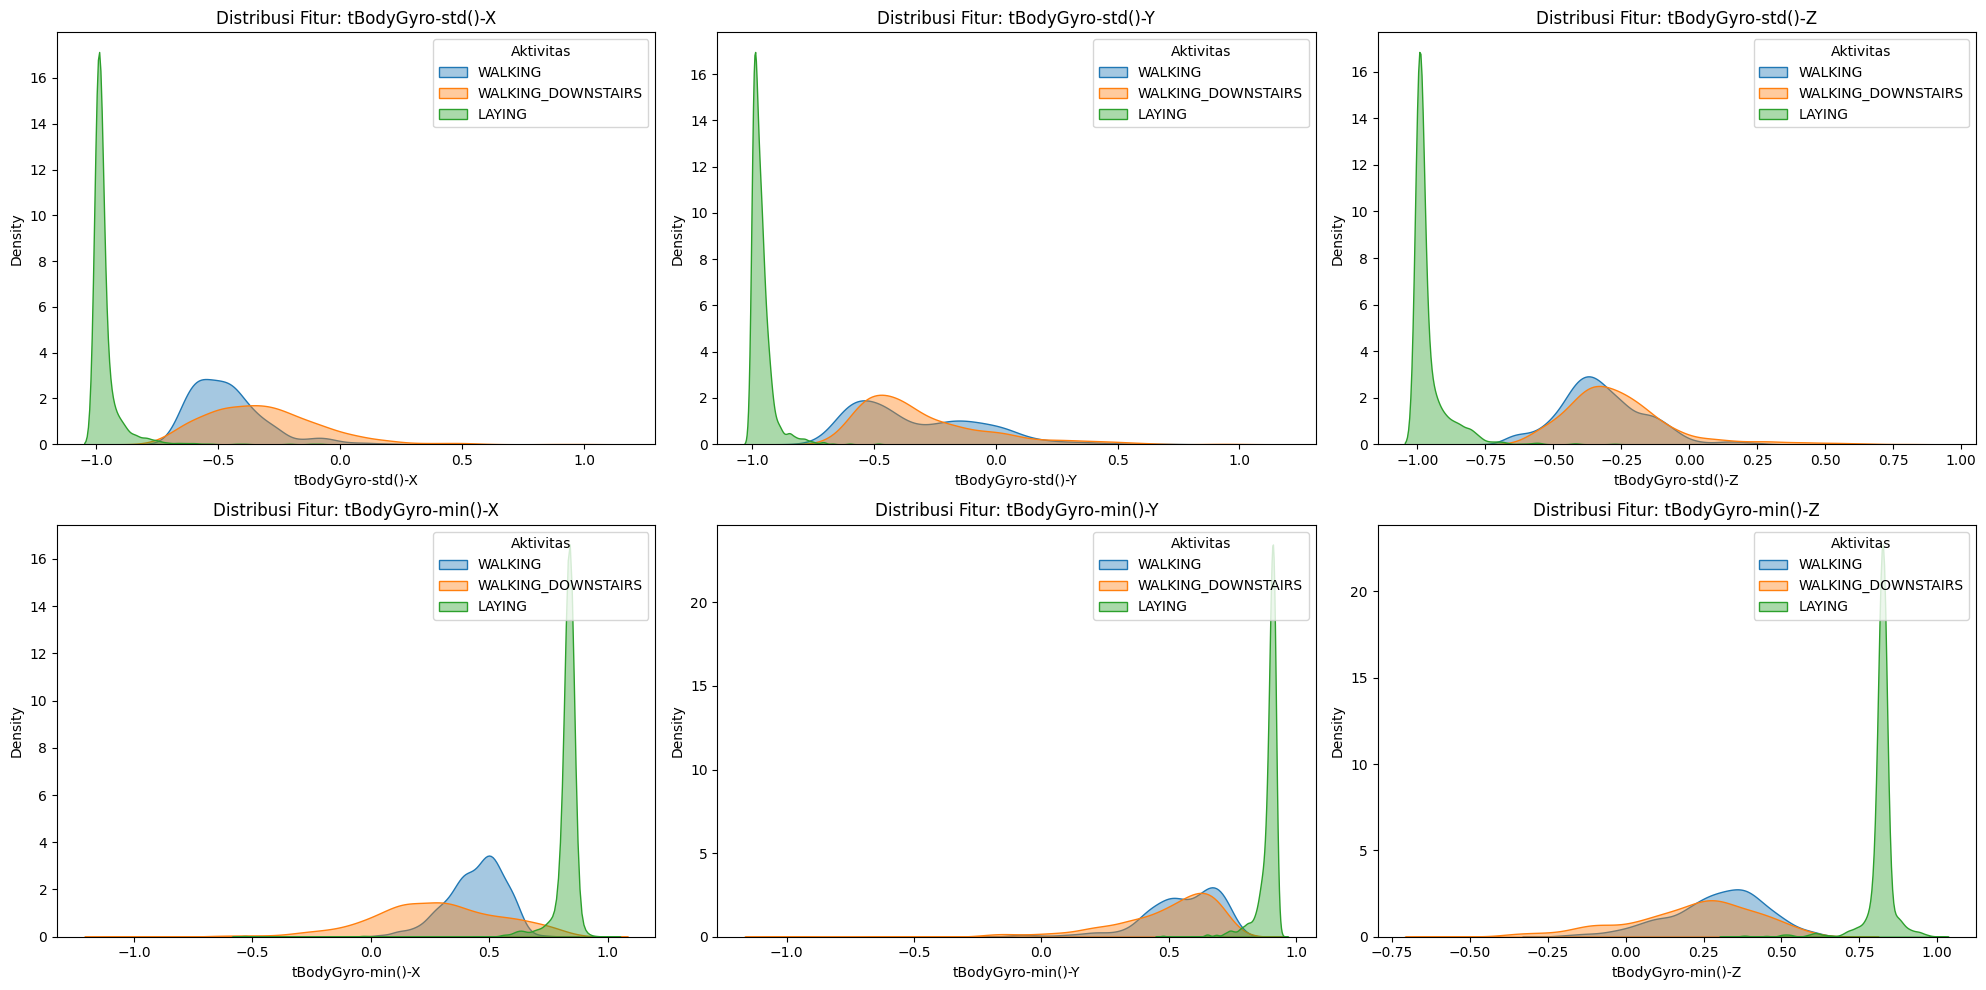

In [ ]:
# Filter gyroscope features
print("Menyiapkan fitur gyroscope...")
gyro_features = [col for col in X_train.columns if 'Gyro' in col and ('min()' in col or 'std()' in col)]
X_train_gyro = X_train[gyro_features]
X_test_gyro = X_test[gyro_features]

# Visualisasi karakteristik fitur gyroscope untuk setiap aktivitas
print("\nVisualisasi karakteristik fitur gyroscope untuk setiap aktivitas...")
plt.figure(figsize=(20, 10))
for i, feature in enumerate(gyro_features[:6]):  # Ambil hingga 6 fitur pertama gyroscope
    plt.subplot(2, 3, i + 1)
    for activity, label in zip([1, 3, 6], ['WALKING', 'WALKING_DOWNSTAIRS', 'LAYING']):
        # Filter data untuk aktivitas tertentu
        activity_data = X_train_gyro[y_train.iloc[:, 0] == activity][feature]
        sns.kdeplot(data=activity_data, label=label, fill=True, alpha=0.4)
    plt.title(f'Distribusi Fitur: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Aktivitas')

plt.tight_layout()
plt.show()

- Fitur pertama menunjukkan bahwa aktivitas LAYING memiliki distribusi yang lebih sempit (konsisten), sedangkan WALKING_DOWNSTAIRS menunjukkan variasi lebih besar.
- Fitur lain menunjukkan tumpang tindih antara distribusi WALKING dan WALKING_DOWNSTAIRS, yang dapat menjadi tantangan dalam proses klasifikasi.
- Grafik distribusi membantu memahami pola gyroscope yang khas untuk masing-masing aktivitas.
- Pola distribusi ini dapat membantu proses pengklasifikasian aktivitas di tahap berikutnya. Distribusi yang jelas dan tidak tumpang tindih menunjukkan fitur yang dapat membedakan aktivitas dengan baik.

Memfilter aktivitas yang dipilih...

Visualisasi data sebelum preprocessing...


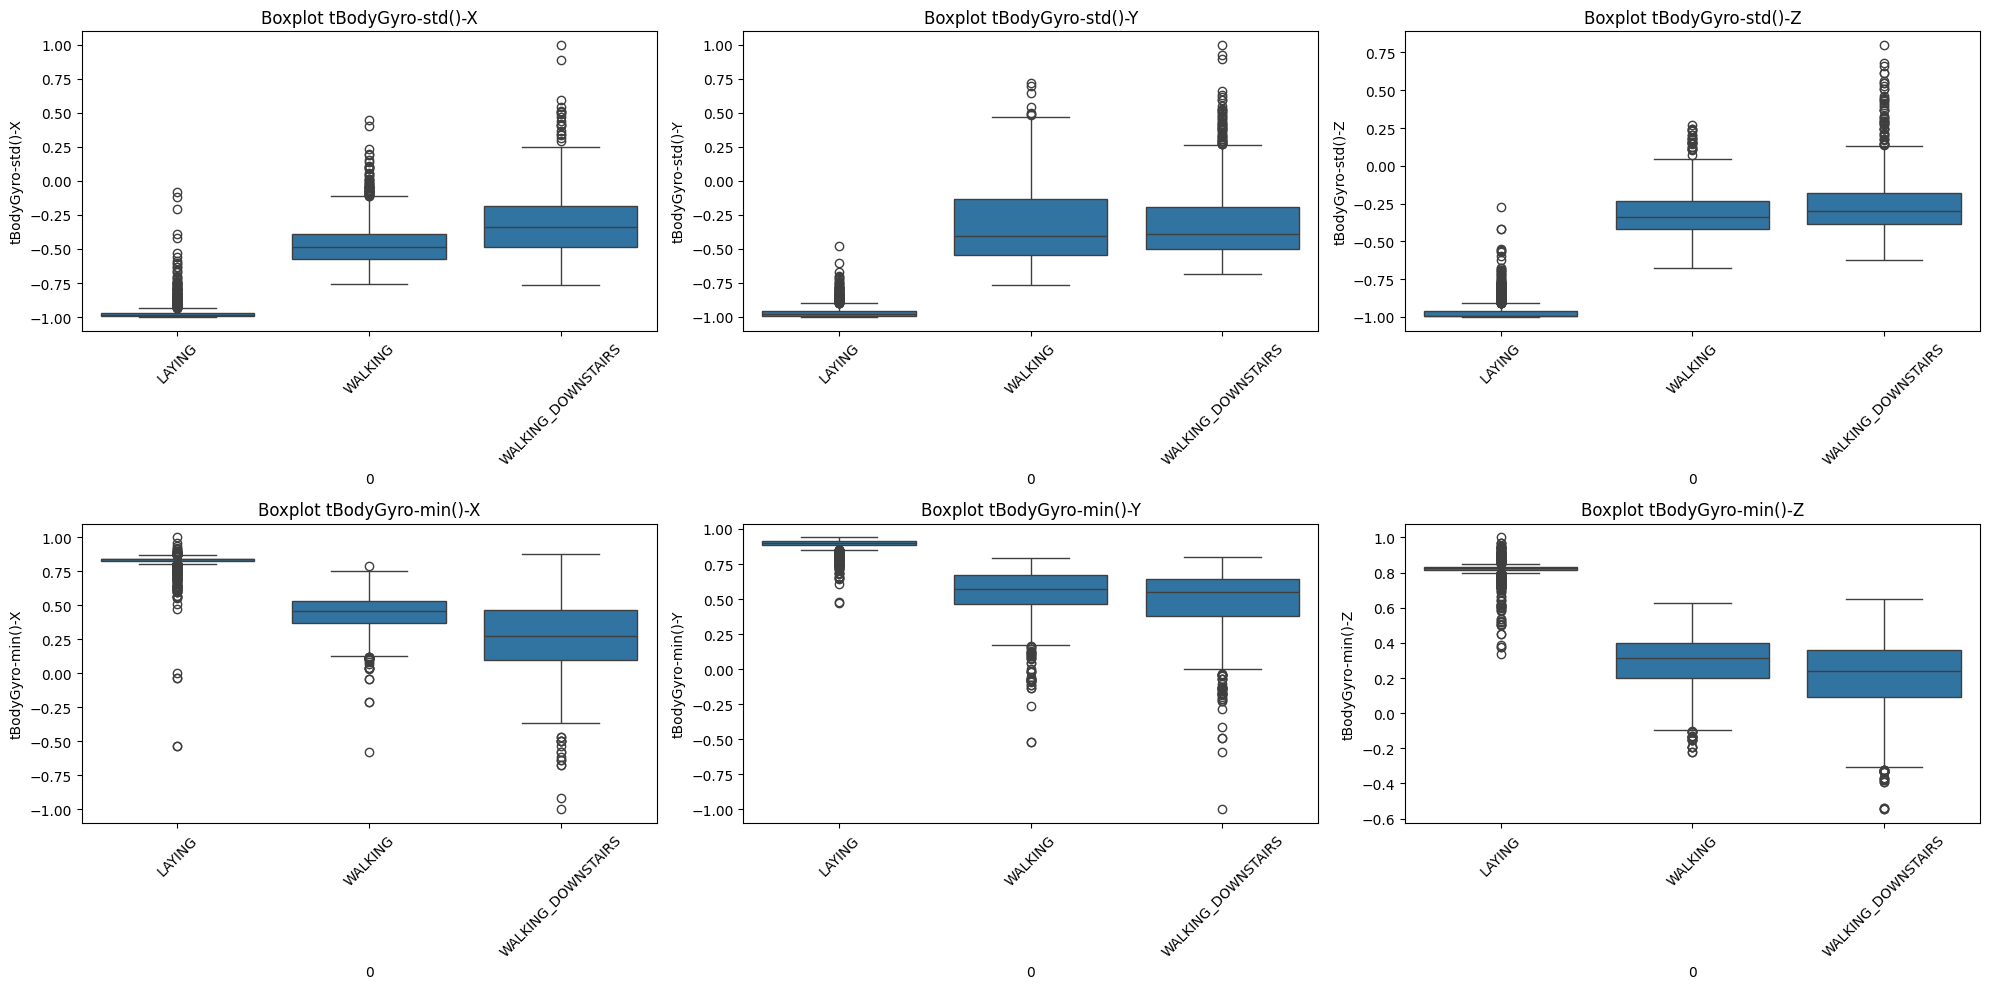


Ukuran data sebelum preprocessing:
X_train_filtered shape: (3619, 26)
y_train_filtered shape: (3619, 1)
X_test_filtered shape: (1453, 26)
y_test_filtered shape: (1453, 1)


In [ ]:
# Filter aktivitas
print("Memfilter aktivitas yang dipilih...")
selected_activities = [1, 3, 6]
train_mask = y_train[0].isin(selected_activities)
test_mask = y_test[0].isin(selected_activities)

X_train_filtered = X_train_gyro[train_mask]
y_train_filtered = y_train[train_mask]
X_test_filtered = X_test_gyro[test_mask]
y_test_filtered = y_test[test_mask]

# Map labels
activity_map = {
    1: 'WALKING',
    3: 'WALKING_DOWNSTAIRS',
    6: 'LAYING'
}

y_train_filtered[0] = pd.Series(y_train_filtered[0]).map(activity_map)
y_test_filtered[0] = pd.Series(y_test_filtered[0]).map(activity_map)

# 5. Visualisasi data sebelum preprocessing
print("\nVisualisasi data sebelum preprocessing...")
plt.figure(figsize=(20, 10))
for i, feature in enumerate(gyro_features[:6]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=X_train_filtered, y=feature, x=y_train_filtered[0])
    plt.title(f'Boxplot {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print informasi data
print("\nUkuran data sebelum preprocessing:")
print(f"X_train_filtered shape: {X_train_filtered.shape}")
print(f"y_train_filtered shape: {y_train_filtered.shape}")
print(f"X_test_filtered shape: {X_test_filtered.shape}")
print(f"y_test_filtered shape: {y_test_filtered.shape}")

Grafik ini bertujuan menunjukkan persebaran nilai enam fitur pertama dari data gyroscope sebelum dilakukan preprocessing, untuk setiap aktivitas (WALKING, WALKING_DOWNSTAIRS, dan LAYING). Disini grafik menunjukkan bahwasanya masih terdapat outliers dalam persebaran nilai dari tiap fitur dataset ini.


- Informasi Ukuran Data:
  - X_train_filtered memiliki 3.619 baris dan 26 kolom fitur.
  - y_train_filtered memiliki 3.619 baris dan 1 kolom label.
  - X_test_filtered memiliki 1.453 baris dan 26 kolom fitur.
  - y_test_filtered memiliki 1.453 baris dan 1 kolom label.

## **Step 4: Data Preprocessing**

Melakukan preprocessing data...

Visualisasi data setelah preprocessing...


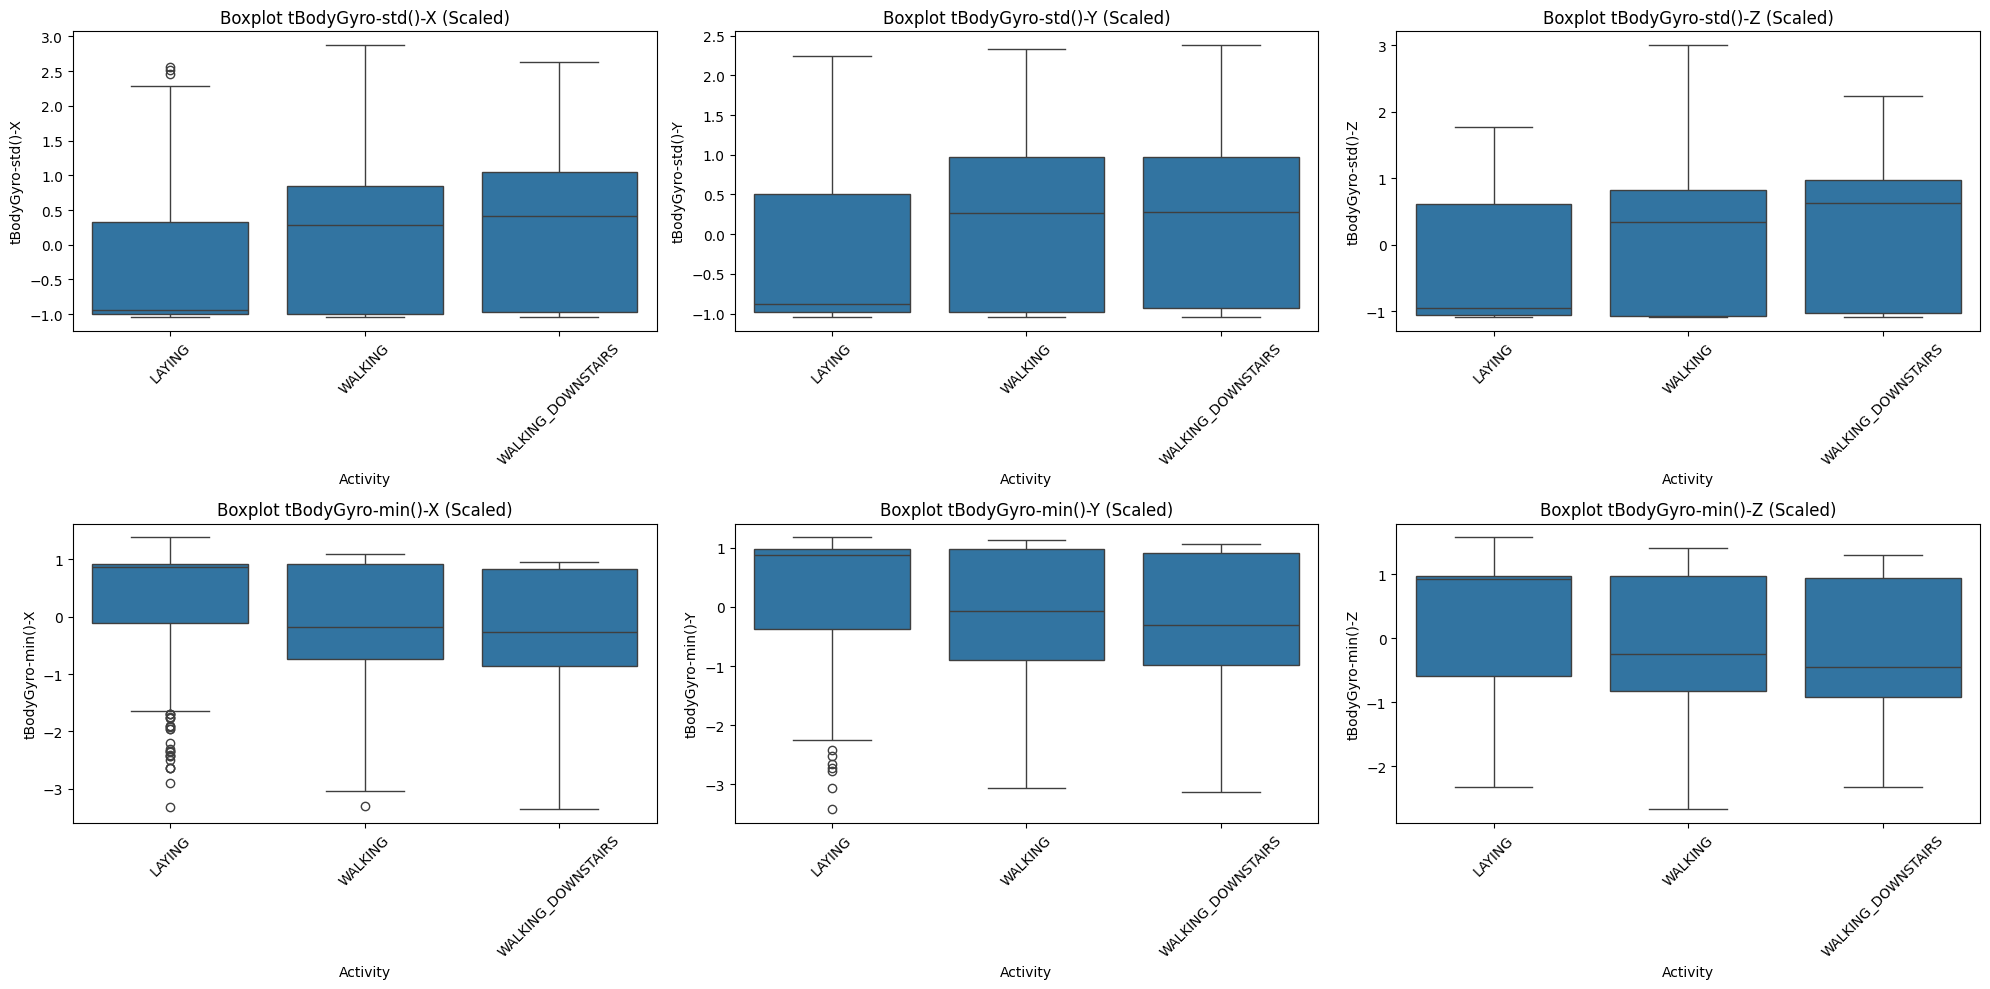


Ukuran data setelah preprocessing:
X_train_scaled shape: (2928, 26)
y_train_no_outliers shape: (2928, 1)
X_test_scaled shape: (1233, 26)
y_test_no_outliers shape: (1233, 1)


In [ ]:
# Preprocessing
print("Melakukan preprocessing data...")

# Hitung Q1 dan Q3 untuk setiap fitur
q1 = X_train_filtered.quantile(0.25)
q3 = X_train_filtered.quantile(0.75)
iqr = q3 - q1

# Tentukan batas bawah dan atas
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Hapus outlier dari data
X_train_no_outliers = X_train_filtered[(X_train_filtered < upper).all(axis=1) & (X_train_filtered > lower).all(axis=1)]
y_train_no_outliers = y_train_filtered[(X_train_filtered < upper).all(axis=1) & (X_train_filtered > lower).all(axis=1)]
X_test_no_outliers = X_test_filtered[(X_test_filtered < upper).all(axis=1) & (X_test_filtered > lower).all(axis=1)]
y_test_no_outliers = y_test_filtered[(X_test_filtered < upper).all(axis=1) & (X_test_filtered > lower).all(axis=1)]

# Standarisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_no_outliers)
X_test_scaled = scaler.transform(X_test_no_outliers)

# Visualisasi data setelah preprocessing
print("\nVisualisasi data setelah preprocessing...")
plt.figure(figsize=(20, 10))
scaled_df = pd.DataFrame(X_train_scaled, columns=gyro_features)
scaled_df['Activity'] = y_train_no_outliers[0]
for i, feature in enumerate(gyro_features[:6]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=scaled_df, y=feature, x='Activity')
    plt.title(f'Boxplot {feature} (Scaled)')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print informasi data setelah preprocessing
print("\nUkuran data setelah preprocessing:")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train_no_outliers shape: {y_train_no_outliers.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_test_no_outliers shape: {y_test_no_outliers.shape}")

Grafik menunjukkan persebaran nilai fitur yang telah distandarisasi untuk tiga aktivitas (WALKING, WALKING_DOWNSTAIRS, dan LAYING), setelah dilakukan preprocessing.

- Grafik menunjukkan data lebih seragam karena telah distandarisasi.
- Outlier yang berlebihan telah dihapus, sehingga distribusi data lebih merata.
- Beberapa fitur mungkin tetap menunjukkan variasi distribusi berdasarkan aktivitas, yang mencerminkan pola unik setiap aktivitas.


  - Informasi Data Setelah Preprocessing:
    - X_train_scaled: 2.928 baris dan 26 fitur.
    - y_train_no_outliers: 2.928 baris dengan 1 kolom label.
    - X_test_scaled: 1.233 baris dan 26 fitur.
    - y_test_no_outliers: 1.233 baris dengan 1 kolom label.


In [ ]:
# Prepare labels for neural network
print("Preparing labels for neural network...")
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_no_outliers[0])
y_test_encoded = le.transform(y_test_no_outliers[0])

def to_one_hot(y, num_classes):
    return np.eye(num_classes)[y]

y_train_onehot = to_one_hot(y_train_encoded, len(np.unique(y_train_encoded)))
y_test_onehot = to_one_hot(y_test_encoded, len(np.unique(y_test_encoded)))

print("\nUkuran data final untuk neural network:")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train_onehot shape: {y_train_onehot.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_test_onehot shape: {y_test_onehot.shape}")

Preparing labels for neural network...

Ukuran data final untuk neural network:
X_train_scaled shape: (2928, 26)
y_train_onehot shape: (2928, 3)
X_test_scaled shape: (1233, 26)
y_test_onehot shape: (1233, 3)


Ukuran Data Final

Setelah semua persiapan selesai, ukuran dataset final:
- X_train_scaled: Dataset training dengan 2.928 baris dan 26 fitur.
- y_train_onehot: Label data training dalam format one-hot encoding dengan 2.928 baris dan 3 kolom (satu kolom untuk setiap kategori aktivitas).
- X_test_scaled: Dataset test dengan 1.233 baris dan 26 fitur.
- y_test_onehot: Label data test dalam format one-hot encoding dengan 1.233 baris dan 3 kolom.

## **Step 5: Implement Neural Network from Scratch with Backpropagation**

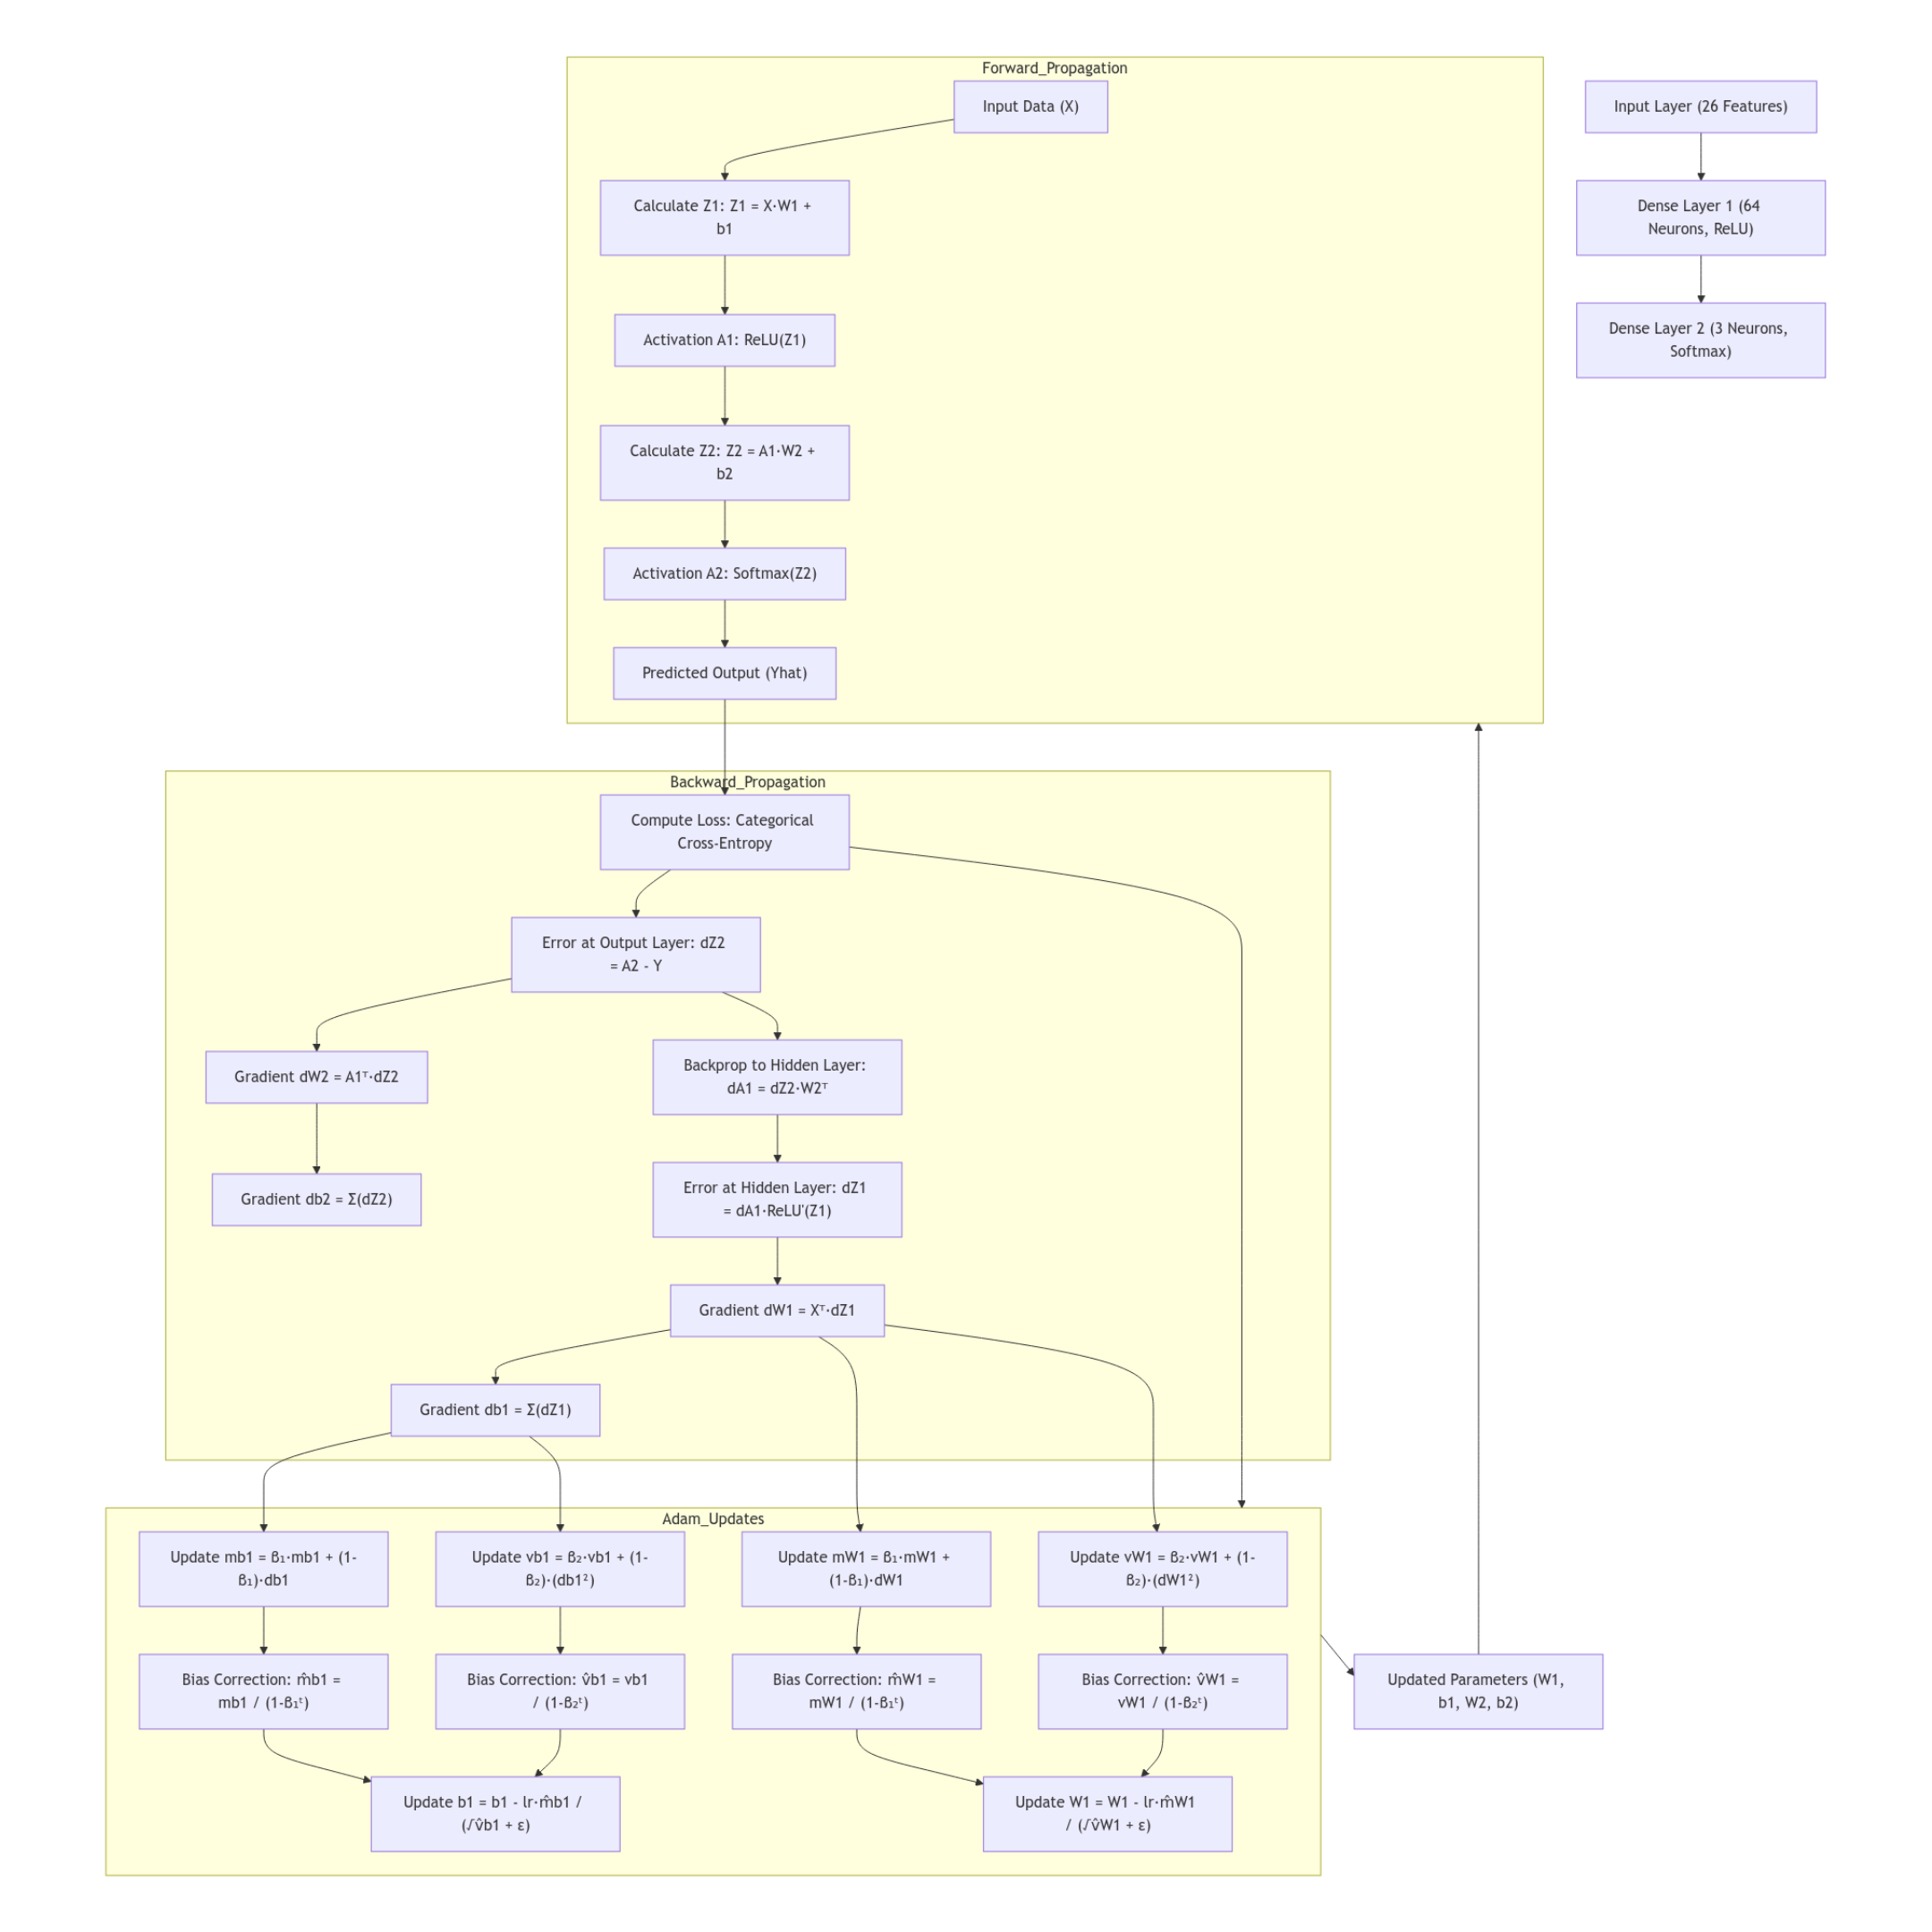

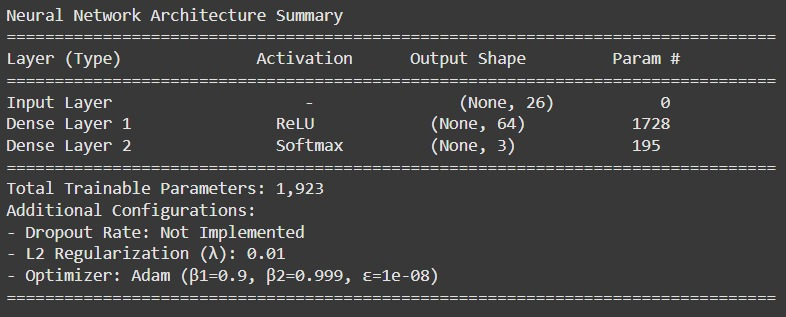

In [ ]:
class EnhancedNeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8):
        """
        Inisialisasi jaringan saraf.
        Args:
            input_size: Jumlah fitur di input layer.
            hidden_sizes: Daftar ukuran setiap hidden layer.
            output_size: Jumlah neuron di output layer (jumlah kelas).
            learning_rate: Kecepatan pembelajaran (learning rate).
            beta1: Faktor momentum untuk Adam optimizer.
            beta2: Faktor velocity untuk Adam optimizer.
            epsilon: Nilai kecil untuk mencegah pembagian dengan nol dalam Adam.
        """
        # Dimensi setiap layer (input, hidden, dan output)
        self.layers_dims = [input_size] + hidden_sizes + [output_size]
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon

        # Parameter jaringan (W: bobot, b: bias)
        self.parameters = {}

        # Momentum (m) dan velocity (v) untuk Adam optimizer
        self.m = {}
        self.v = {}

        # Penyimpanan aktivasi untuk forward propagation
        self.activations = {}

        # Inisialisasi parameter jaringan
        self.initialize_parameters()

        # History untuk menyimpan loss dan akurasi selama pelatihan
        self.loss_history = []
        self.val_loss_history = []
        self.accuracy_history = []

        # Variabel waktu untuk Adam optimizer (diperlukan untuk bias correction)
        self.t = 0

    def initialize_parameters(self):
        """
        Inisialisasi parameter W (bobot) dan b (bias) menggunakan He initialization.
        He initialization digunakan untuk menjaga stabilitas gradien pada layer ReLU.
        """
        for l in range(1, len(self.layers_dims)):
            # Bobot W diinisialisasi dengan He initialization
            self.parameters[f'W{l}'] = np.random.randn(self.layers_dims[l-1], self.layers_dims[l]) * np.sqrt(2. / self.layers_dims[l-1])
            # Bias b diinisialisasi ke nol
            self.parameters[f'b{l}'] = np.zeros((1, self.layers_dims[l]))

            # Inisialisasi momentum dan velocity untuk gradien W dan b
            self.m[f'dW{l}'], self.m[f'db{l}'] = np.zeros_like(self.parameters[f'W{l}']), np.zeros_like(self.parameters[f'b{l}'])
            self.v[f'dW{l}'], self.v[f'db{l}'] = np.zeros_like(self.parameters[f'W{l}']), np.zeros_like(self.parameters[f'b{l}'])

    def relu(self, x):
        """Fungsi aktivasi ReLU (Rectified Linear Unit) untuk hidden layer."""
        return np.maximum(0, x)

    def relu_derivative(self, x):
        """Turunan fungsi ReLU untuk backpropagation."""
        return (x > 0).astype(float)

    def softmax(self, x):
        """
        Fungsi aktivasi Softmax untuk output layer, dengan stabilitas numerik.
        Softmax mengubah skor mentah menjadi probabilitas yang dapat dijumlahkan menjadi 1.
        """
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))  # Normalisasi untuk menghindari overflow
        return exps / np.sum(exps, axis=1, keepdims=True)  # Normalisasi probabilitas

    def forward(self, X, training=True):
        """
        Forward propagation melalui jaringan.
        Args:
            X: Input data.
            training: Jika True, menyimpan aktivasi untuk backpropagation.
        Returns:
            Aktivasi terakhir (output prediksi).
        """
        self.activations['A0'] = X  # Input layer sebagai aktivasi awal

        for l in range(1, len(self.layers_dims) - 1):
            # Hitung Z = A_prev * W + b
            Z = np.dot(self.activations[f'A{l-1}'], self.parameters[f'W{l}']) + self.parameters[f'b{l}']
            self.activations[f'Z{l}'] = Z  # Simpan Z untuk backpropagation
            self.activations[f'A{l}'] = self.relu(Z)  # Terapkan fungsi aktivasi ReLU

        # Output layer
        L = len(self.layers_dims) - 1
        Z = np.dot(self.activations[f'A{L-1}'], self.parameters[f'W{L}']) + self.parameters[f'b{L}']
        self.activations[f'Z{L}'] = Z
        self.activations[f'A{L}'] = self.softmax(Z)  # Terapkan fungsi Softmax untuk prediksi akhir
        return self.activations[f'A{L}']

    def backward(self, X, y):
        """
        Backward propagation melalui jaringan, diperbarui dengan Adam optimizer.
        Args:
            X: Input data.
            y: Label asli (one-hot encoded).
        """
        m = y.shape[0]  # Jumlah sampel
        L = len(self.layers_dims) - 1  # Indeks layer terakhir
        lambda_reg = 0.01  # Koefisien regularisasi L2

        # Gradien untuk output layer
        dZ = self.activations[f'A{L}'] - y  # Derivasi loss terhadap Z output

        for l in reversed(range(1, L + 1)):
            # Hitung gradien bobot (dW) dan bias (db)
            dW = np.dot(self.activations[f'A{l-1}'].T, dZ) / m + (lambda_reg * self.parameters[f'W{l}']) / m
            db = np.sum(dZ, axis=0, keepdims=True) / m

            if l > 1:
                dA = np.dot(dZ, self.parameters[f'W{l}'].T)  # Gradien A sebelumnya
                dZ = dA * self.relu_derivative(self.activations[f'Z{l-1}'])  # Turunan ReLU

            # Update dengan Adam optimizer
            self.t += 1  # Update langkah waktu
            self.m[f'dW{l}'] = self.beta1 * self.m[f'dW{l}'] + (1 - self.beta1) * dW
            self.m[f'db{l}'] = self.beta1 * self.m[f'db{l}'] + (1 - self.beta1) * db
            self.v[f'dW{l}'] = self.beta2 * self.v[f'dW{l}'] + (1 - self.beta2) * (dW ** 2)
            self.v[f'db{l}'] = self.beta2 * self.v[f'db{l}'] + (1 - self.beta2) * (db ** 2)

            # Bias correction
            m_hat_dw = self.m[f'dW{l}'] / (1 - self.beta1 ** self.t)
            m_hat_db = self.m[f'db{l}'] / (1 - self.beta1 ** self.t)
            v_hat_dw = self.v[f'dW{l}'] / (1 - self.beta2 ** self.t)
            v_hat_db = self.v[f'db{l}'] / (1 - self.beta2 ** self.t)

            # Update parameter
            self.parameters[f'W{l}'] -= self.learning_rate * m_hat_dw / (np.sqrt(v_hat_dw) + self.epsilon)
            self.parameters[f'b{l}'] -= self.learning_rate * m_hat_db / (np.sqrt(v_hat_db) + self.epsilon)

    def compute_loss(self, y_true, y_pred):
        """
        Menghitung loss menggunakan fungsi categorical cross-entropy.
        Args:
            y_true: Array label asli dalam format one-hot encoding (m x c).
            y_pred: Array prediksi probabilitas (m x c).
        Returns:
            loss: Nilai loss rata-rata untuk seluruh sampel.
        """
        m = y_true.shape[0]  # Jumlah sampel
        # Hitung cross-entropy loss untuk setiap sampel
        # Tambahkan epsilon (1e-15) untuk menghindari log(0) yang menghasilkan nilai -inf
        loss = -np.mean(np.sum(y_true * np.log(y_pred + 1e-15), axis=1))
        return loss


    def train(self, X, y, X_val, y_val, epochs, batch_size):
        """
        Melatih model dengan menggunakan forward propagation, backward propagation, dan pembaruan parameter.
        Args:
            X: Data training, ukuran (m x fitur).
            y: Label one-hot untuk data training, ukuran (m x kelas).
            X_val: Data validasi, ukuran (m_val x fitur).
            y_val: Label one-hot untuk data validasi, ukuran (m_val x kelas).
            epochs: Jumlah iterasi pelatihan.
            batch_size: Ukuran batch untuk training mini-batch gradient descent.
        """
        for epoch in range(epochs):  # Iterasi melalui seluruh epoch
            # Mengacak urutan data training untuk meningkatkan generalisasi
            indices = np.random.permutation(X.shape[0])
            X_shuffled, y_shuffled = X[indices], y[indices]

            # Iterasi melalui data dalam mini-batch
            for i in range(0, X.shape[0], batch_size):
                # Ambil subset data (mini-batch) berdasarkan indeks
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]

                # Forward propagation untuk menghitung output
                self.forward(X_batch)
                # Backward propagation untuk menghitung gradien dan memperbarui parameter
                self.backward(X_batch, y_batch)

            # Hitung metrik evaluasi setelah setiap epoch
            train_loss = self.compute_loss(y, self.forward(X))  # Loss untuk data training
            val_loss = self.compute_loss(y_val, self.forward(X_val))  # Loss untuk data validasi
            val_preds = np.argmax(self.forward(X_val), axis=1)  # Prediksi label untuk data validasi
            val_true = np.argmax(y_val, axis=1)  # Label asli data validasi
            val_accuracy = np.mean(val_preds == val_true)  # Akurasi data validasi

            # Simpan metrik ke dalam history untuk analisis lebih lanjut
            self.loss_history.append(train_loss)
            self.val_loss_history.append(val_loss)
            self.accuracy_history.append(val_accuracy)

            # Cetak metrik setiap kelipatan 100 epoch untuk memantau proses pelatihan
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}, Val Accuracy = {val_accuracy:.4f}")


    def model_summary(self):
        """Print detailed model architecture summary"""
        print("Neural Network Architecture Summary")
        print("=" * 80)
        print(f"{'Layer (Type)':<25} {'Activation':<15} {'Output Shape':<20} {'Param #':<15}")
        print("=" * 80)

        # Input Layer
        print(f"Input Layer{'':<19} {'-':<15} {str((None, self.layers_dims[0])):<20} {'0':<15}")

        total_params = 0
        for l in range(1, len(self.layers_dims)):
            # Calculate parameters
            weights = self.layers_dims[l-1] * self.layers_dims[l]  # Weight matrix
            biases = self.layers_dims[l]  # Bias vector
            layer_params = weights + biases
            total_params += layer_params

            # Determine activation
            activation = "Softmax" if l == len(self.layers_dims) - 1 else "ReLU"

            # Print layer details
            print(f"Dense Layer {l:<15} {activation:<15} {str((None, self.layers_dims[l])):<20} {layer_params:<15}")

        print("=" * 80)
        print(f"Total Trainable Parameters: {total_params:,}")
        print("Additional Configurations:")
        print(f"- Dropout Rate: {'Not Implemented' if not hasattr(self, 'dropout_rate') else '20% (during training only)'}")
        print(f"- L2 Regularization (λ): {0.01 if 'lambda_reg' in globals() or locals() else 'Not Set'}")
        print(f"- Optimizer: Adam (β1={self.beta1}, β2={self.beta2}, ε={self.epsilon})")
        print("=" * 80)

Neural Network Architecture Summary
Layer (Type)              Activation      Output Shape         Param #        
Input Layer                    -               (None, 26)           0              
Dense Layer 1               ReLU            (None, 64)           1728           
Dense Layer 2               Softmax         (None, 3)            195            
Total Trainable Parameters: 1,923
Additional Configurations:
- Dropout Rate: Not Implemented
- L2 Regularization (λ): 0.01
- Optimizer: Adam (β1=0.9, β2=0.999, ε=1e-08)

Training model...
Epoch 0: Train Loss = 0.5525, Val Loss = 0.6080, Val Accuracy = 0.7242
Epoch 100: Train Loss = 0.1325, Val Loss = 0.2550, Val Accuracy = 0.8929
Epoch 200: Train Loss = 0.0875, Val Loss = 0.2460, Val Accuracy = 0.8978
Epoch 300: Train Loss = 0.0624, Val Loss = 0.2494, Val Accuracy = 0.8970
Epoch 400: Train Loss = 0.0452, Val Loss = 0.2510, Val Accuracy = 0.8954
Epoch 500: Train Loss = 0.0351, Val Loss = 0.2562, Val Accuracy = 0.8954
Epoch 600: Trai

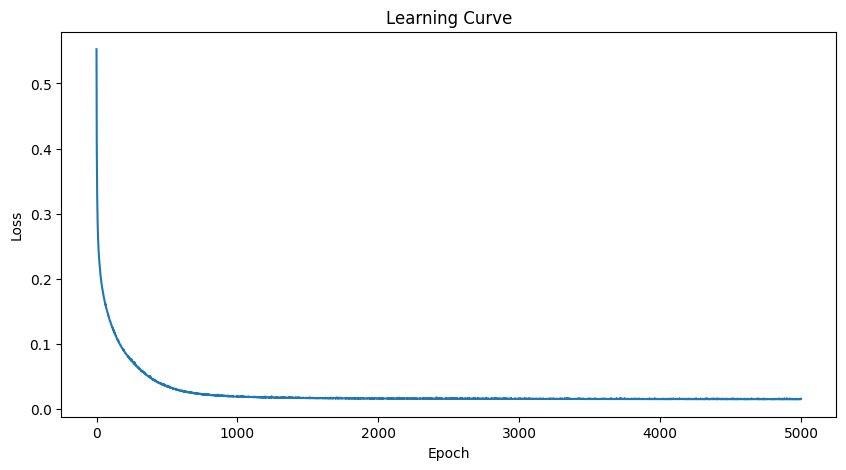

In [ ]:
# Train model dengan data validasi
model = EnhancedNeuralNetwork(
    input_size=X_train_scaled.shape[1],
    hidden_sizes=[64],
    output_size=len(np.unique(y_train_encoded)),
    learning_rate=0.0001
)

# Tampilkan summary model
model.model_summary()

# Training dengan batch size
print("\nTraining model...")
model.train(
    X_train_scaled, y_train_onehot,
    X_test_scaled, y_test_onehot,
    epochs=5000,
    batch_size=16,
)

# Plot learning curve
plt.figure(figsize=(10, 5))
plt.plot(model.loss_history)
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Grafik yang dihasilkan menunjukkan learning curve dengan sumbu-x sebagai jumlah epoch dan sumbu-y sebagai nilai loss. Berikut adalah penjelasan pola grafik:

- Penurunan Awal yang Cepat
  
  Di awal pelatihan, baik train loss maupun validation loss turun dengan cepat, menunjukkan bahwa model belajar dengan baik.
  
- Konsistensi Loss Setelah Epoch Tertentu
  
  Setelah beberapa epoch (~1000), train loss menjadi sangat kecil, lalu stabil. Hal ini menunjukkan bahwa model telah mencapai konvergensi tanpa overfitting yang signifikan.

## **Step 6: Evaluate the Model**

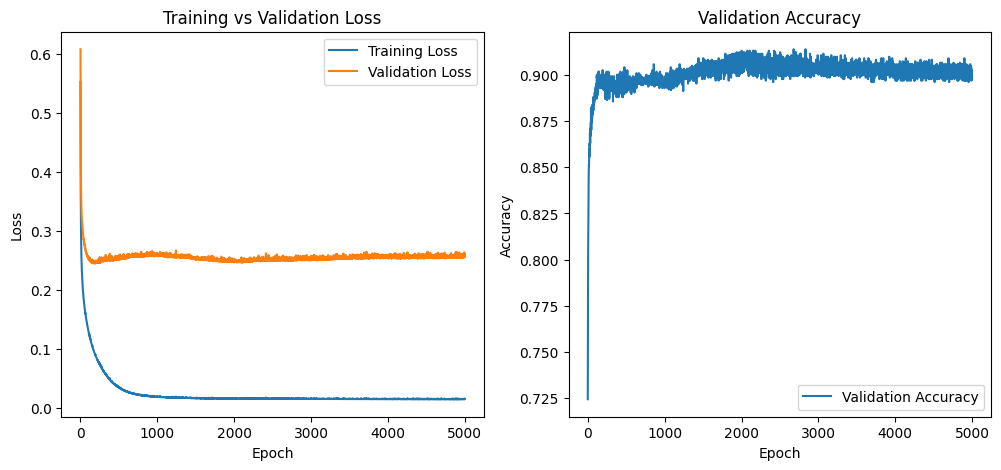

In [ ]:
# Plot Training vs Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(model.loss_history, label='Training Loss')
plt.plot(model.val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

# Plot Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(model.accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy')
plt.show()

1. Grafik Training vs Validation Loss:

  - Pola Penurunan Loss

    Pada awal pelatihan, training loss dan validation loss menurun dengan cepat, menunjukkan bahwa model belajar dari data.

  - Stabilitas di Akhir Pelatihan

    Setelah beberapa epoch, training loss terus menurun hingga sangat kecil, sedangkan validation loss menjadi stabil. Jika validation loss meningkat sementara training loss terus menurun, ini dapat menunjukkan overfitting.

2. Grafik Akurasi Validasi:

  - Peningkatan Awal

    Akurasi validasi meningkat tajam selama tahap awal pelatihan, menunjukkan bahwa model menjadi lebih baik dalam memprediksi data validasi.

  - Stabilitas Akhir

    Setelah beberapa epoch, akurasi validasi cenderung stabil di sekitar 90%, menandakan model mencapai generalization yang baik terhadap data validasi.

Evaluasi model...


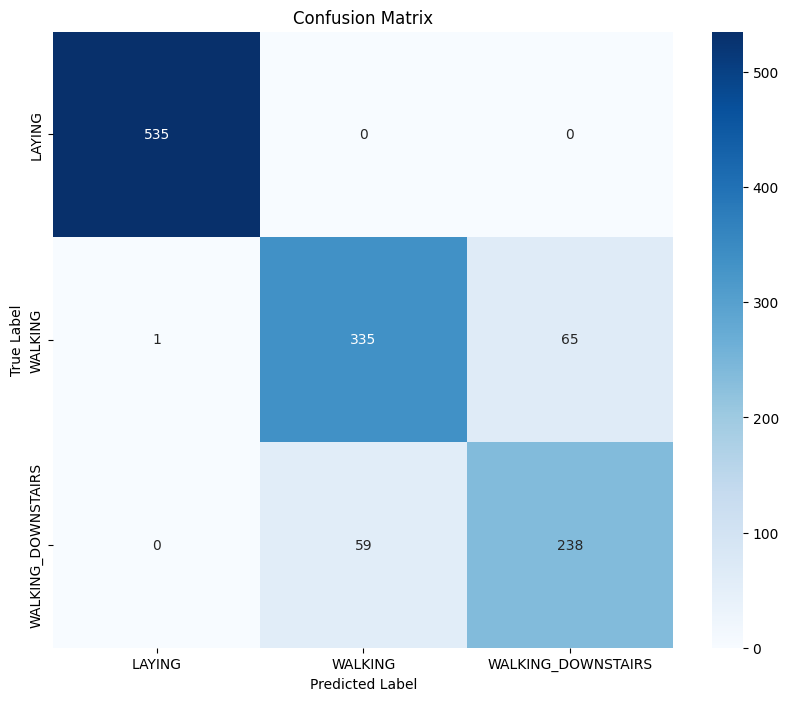

In [ ]:
# 10. Model Evaluation
print("Evaluasi model...")
y_pred = model.forward(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1)

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Confusion matrix pada visualisasi menggambarkan performa model dalam memprediksi tiga kelas aktivitas: LAYING, WALKING, dan WALKING_DOWNSTAIRS.

1. Kinerja Model untuk Kelas "LAYING"
  
    Model memiliki performa yang sangat baik untuk memprediksi aktivitas "LAYING". Semua data uji (sebanyak 535 instance) berhasil diklasifikasikan dengan benar tanpa kesalahan, yang ditunjukkan oleh nilai diagonal yang tinggi (535) dan tidak adanya nilai prediksi pada kolom lainnya.

2. Kinerja Model untuk Kelas "WALKING"
    
    Untuk kelas "WALKING", model menghasilkan 335 prediksi benar tetapi terdapat sejumlah kesalahan klasifikasi. Model salah memprediksi 65 instance sebagai "WALKING_DOWNSTAIRS" dan 1 instance sebagai "LAYING". Hal ini menunjukkan bahwa meskipun model cukup akurat untuk kelas ini, masih terdapat beberapa tumpang tindih dengan aktivitas "WALKING_DOWNSTAIRS".

3. Kinerja Model untuk Kelas "WALKING_DOWNSTAIRS"

    Pada kelas ini, model memprediksi dengan benar 238 instance dari total data. Namun, terdapat 59 instance yang salah diprediksi sebagai "WALKING". Hal ini menunjukkan bahwa model mengalami kesulitan untuk membedakan aktivitas "WALKING" dan "WALKING_DOWNSTAIRS", kemungkinan karena kemiripan fitur pada kedua aktivitas tersebut.

4. Overall Performance
    
    Keakuratan tinggi terlihat pada prediksi untuk kelas "LAYING", sementara performa untuk kelas "WALKING" dan "WALKING_DOWNSTAIRS" menunjukkan bahwa model masih perlu ditingkatkan, terutama untuk mengurangi kesalahan prediksi antar kedua kelas tersebut.

In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes,
                          target_names=le.classes_))

Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       535
           WALKING       0.85      0.84      0.84       401
WALKING_DOWNSTAIRS       0.79      0.80      0.79       297

          accuracy                           0.90      1233
         macro avg       0.88      0.88      0.88      1233
      weighted avg       0.90      0.90      0.90      1233



Analisis Performa Kelas Per Kelas
1. LAYING
  - Precision, Recall, dan F1-Score = 1.00:

    Model mengenali aktivitas ini dengan sempurna tanpa kesalahan. Artinya, setiap prediksi untuk LAYING benar, dan semua data uji untuk LAYING terdeteksi dengan baik.

  - Support = 535:
  
    Aktivitas ini memiliki jumlah sampel tertinggi di dataset, yang mungkin membantu model belajar pola dengan lebih baik.

2. WALKING
  - Precision = 0.85, Recall = 0.84, F1-Score = 0.84:

    Model cukup baik mengenali aktivitas ini, meskipun ada kesalahan yang mengurangi performa.

  - Kesalahan Umum:
    
    Prediksi model mungkin bingung antara WALKING dan aktivitas lain seperti WALKING_DOWNSTAIRS, karena keduanya memiliki pola gerakan yang mirip.

  - Support = 401:
    
    Aktivitas ini memiliki jumlah data yang cukup seimbang, tetapi kesalahan bisa disebabkan oleh overlapping fitur antar kelas.

3. WALKING_DOWNSTAIRS
  - Precision = 0.79, Recall = 0.80, F1-Score = 0.79:
    
    Performa model paling rendah pada kelas ini. Recall yang lebih rendah menunjukkan bahwa model gagal mengenali beberapa sampel dari kelas ini, mungkin karena data yang lebih sedikit atau pola yang lebih sulit dibedakan dari kelas lain.
  
  - Support = 297:
    
    Jumlah data yang lebih sedikit dibandingkan LAYING dan WALKING kemungkinan membuat model kesulitan mempelajari pola dengan baik.


Analisis Performa Keseluruhan
1. Akurasi Global = 0.90
    
    Model mampu membuat prediksi yang benar untuk 90% dari total 1.233 sampel. Ini menunjukkan performa yang cukup baik.

2. Macro Avg (Precision, Recall, F1-Score = 0.88)
    
    Rata-rata performa antar kelas relatif tinggi, tetapi sedikit di bawah akurasi global. Hal ini menunjukkan adanya ketidakseimbangan performa antar kelas.

3. Weighted Avg (Precision, Recall, F1-Score = 0.90)
    
    Rata-rata berbobot ini konsisten dengan akurasi global karena mempertimbangkan jumlah sampel per kelas. Kelas LAYING yang memiliki performa sempurna mendominasi kontribusi ke rata-rata berbobot.

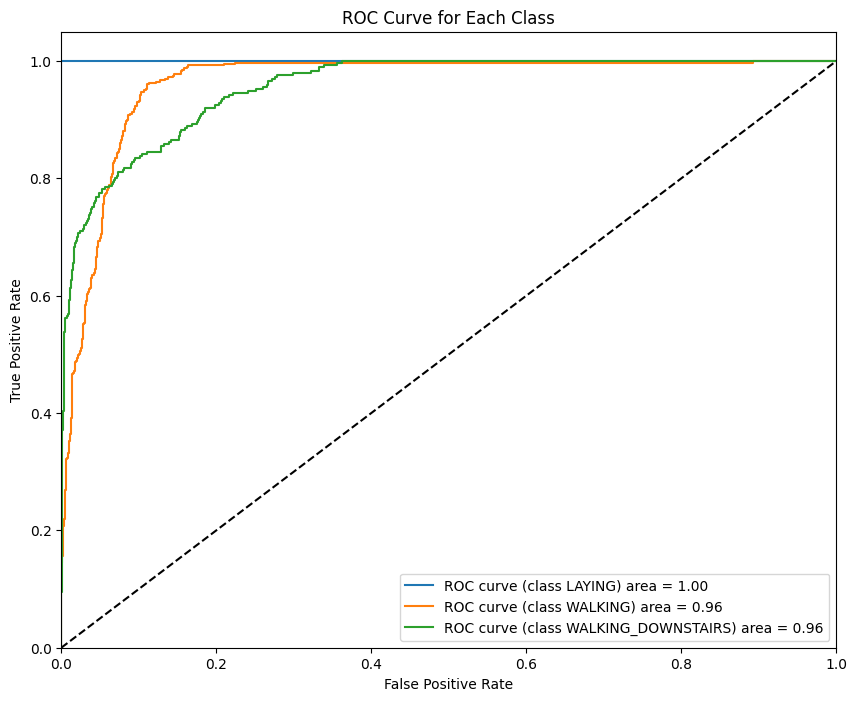

In [ ]:
from sklearn.metrics import roc_curve, auc

# Plot ROC Curve
n_classes = y_train_onehot.shape[1]
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_onehot[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {le.classes_[i]}) area = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

ROC curve pada visualisasi menggambarkan kemampuan model dalam membedakan antara tiga kelas: LAYING, WALKING, dan WALKING_DOWNSTAIRS:
1. Kelas "LAYING"
    
    ROC curve untuk kelas "LAYING" menunjukkan performa sempurna, dengan nilai AUC = 1.00. Hal ini mengindikasikan bahwa model memiliki kemampuan 100% untuk memisahkan kelas "LAYING" dari kelas lainnya tanpa adanya kesalahan prediksi pada berbagai ambang batas (threshold). ROC curve ini mendekati sumbu kiri dan atas, mencerminkan akurasi yang sangat tinggi.

2. Kelas "WALKING"
    
    ROC curve untuk kelas "WALKING" memiliki nilai AUC = 0.96, yang mencerminkan performa model yang sangat baik, meskipun tidak sempurna. Grafik menunjukkan bahwa model cukup konsisten dalam membedakan kelas "WALKING" dari dua kelas lainnya, tetapi ada sedikit tumpang tindih dalam prediksi, yang dapat menyebabkan kesalahan pada ambang batas tertentu.

3. Kelas "WALKING_DOWNSTAIRS"
    
    ROC curve untuk kelas "WALKING_DOWNSTAIRS" juga memiliki nilai AUC = 0.96, yang mirip dengan kelas "WALKING". Ini menunjukkan performa model yang sangat baik dalam memprediksi kelas ini, tetapi ada beberapa tantangan dalam membedakannya dari kelas lain, khususnya "WALKING".

4. Performa Keseluruhan
    
    Garis diagonal putus-putus menunjukkan performa tebakkan acak (AUC = 0.5). Semua ROC curve berada jauh di atas garis ini, mengindikasikan bahwa model memiliki performa prediksi yang jauh lebih baik daripada prediksi acak. Nilai AUC yang tinggi untuk ketiga kelas mengindikasikan bahwa model secara keseluruhan mampu membedakan kelas dengan baik.

Kesimpulannya, model menunjukkan performa yang sangat baik untuk semua kelas, terutama pada kelas "LAYING" yang sempurna. Namun, model masih dapat ditingkatkan untuk mengurangi tumpang tindih antara kelas "WALKING" dan "WALKING_DOWNSTAIRS", yang terlihat dari AUC yang tidak mencapai 1.00 untuk kedua kelas tersebut.

Analisis Misclassification...
Jumlah data yang salah klasifikasi: 125

Detail Misclassification
Distribusi kesalahan klasifikasi:
True_Activity       Predicted_Activity
WALKING             LAYING                 1
                    WALKING_DOWNSTAIRS    65
WALKING_DOWNSTAIRS  WALKING               59
dtype: int64


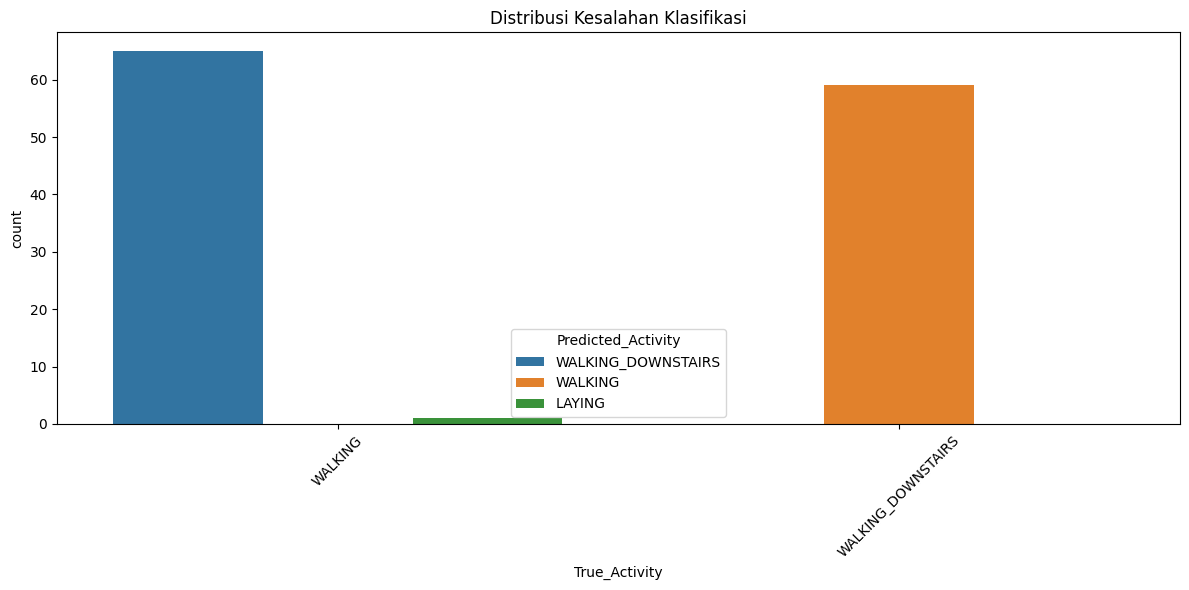

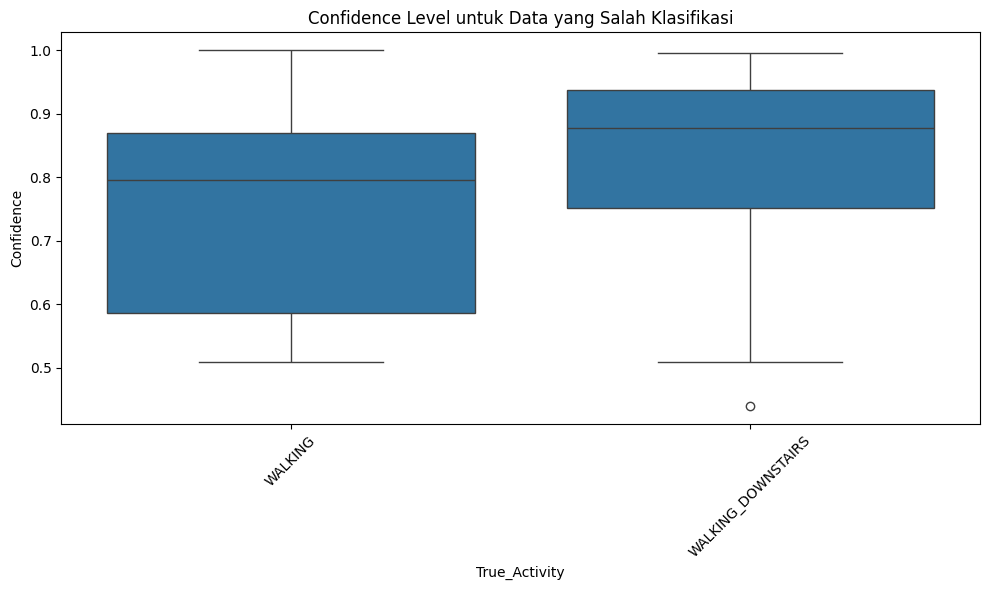

In [ ]:
# 11. Analisis Misclassification
print("Analisis Misclassification...")
misclassified_idx = np.where(y_pred_classes != y_true_classes)[0]
print(f"Jumlah data yang salah klasifikasi: {len(misclassified_idx)}")

if len(misclassified_idx) > 0:
    print("\nDetail Misclassification")
    misclassified_data = pd.DataFrame({
        'True_Activity': le.classes_[y_true_classes[misclassified_idx]],
        'Predicted_Activity': le.classes_[y_pred_classes[misclassified_idx]],
        'Confidence': np.max(y_pred[misclassified_idx], axis=1)
    })

    print("Distribusi kesalahan klasifikasi:")
    print(misclassified_data.groupby(['True_Activity', 'Predicted_Activity']).size())

    # Visualisasi misclassification
    plt.figure(figsize=(12, 6))
    sns.countplot(data=misclassified_data, x='True_Activity', hue='Predicted_Activity')
    plt.title('Distribusi Kesalahan Klasifikasi')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print()

    # Analisis confidence level untuk misclassification
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=misclassified_data, x='True_Activity', y='Confidence')
    plt.title('Confidence Level untuk Data yang Salah Klasifikasi')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Distribusi Kesalahan:
- WALKING salah diklasifikasikan sebagai LAYING: 1 kasus.
- WALKING salah diklasifikasikan sebagai WALKING_DOWNSTAIRS: 65 kasus.
- WALKING_DOWNSTAIRS salah diklasifikasikan sebagai WALKING: 59 kasus.

Grafik 1: Distribusi Kesalahan Klasifikasi
- Grafik ini menunjukkan bahwa sebagian besar kesalahan klasifikasi terjadi antara aktivitas WALKING dan WALKING_DOWNSTAIRS.
- Aktivitas LAYING salah diklasifikasikan sebagai WALKING hanya pada satu kasus, yang menunjukkan bahwa aktivitas ini relatif lebih mudah dibedakan.
- Sebaliknya, aktivitas dinamis seperti WALKING dan WALKING_DOWNSTAIRS memiliki lebih banyak tumpang tindih, sehingga lebih sering terjadi kesalahan

Grafik 2: Confidence Level pada Data Salah Klasifikasi
- Grafik menunjukkan tingkat kepercayaan model pada data yang salah diklasifikasikan.
- Aktivitas dengan confidence tinggi pada kesalahan klasifikasi menunjukkan bahwa model sangat yakin terhadap prediksi yang ternyata salah. Ini mungkin menunjukkan adanya masalah pada data fitur atau model.
- Aktivitas seperti WALKING_DOWNSTAIRS cenderung memiliki rentang confidence yang lebih besar, yang menunjukkan prediksi yang tidak konsisten.